In [1]:
import os

if not {"word2vec.model", "word2vec.model.vectors.npy"}.issubset(set(os.listdir())):
    # Get the pretrained Google Word2Vec dataset
    # This might take a couple minutes
    print("Downloading Google word2vec dataset...")

    import gensim.downloader
    wv = gensim.downloader.load("word2vec-google-news-300")
    wv.save("./word2vec.model")

    print("Download complete.")

print("File Exists")

from gensim.models import KeyedVectors
wv = KeyedVectors.load("word2vec.model", mmap="r")
print(wv)

File Exists
KeyedVectors<vector_size=300, 3000000 keys>


In [2]:
import numpy as np

x = []
for i in range(300):
    x.append(wv[i])

# x = np.array([])
# for i in range(300):
#     np.append(x, wv[i])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
import array as arr

def dataAnalysis(dim, data):
    pca = decomposition.PCA(n_components=int(dim))
    pca.fit(data)
    return pca.transform(data)

def findDim(data, start=0, end=300):
    print(start)
    print(end)
    if start >= end:
        return end
    else:
        mid = (start + end)//2
        if not playable(mid, data):
            return findDim(data, mid + 1, end)
        else:
            return findDim(data, start, mid-1)
    #sort the components in the order of necessity and then truncate to a few !!!

    #pca.transform() mid
    #basically store largest array, truncate if amt is <
    #and then also use current components 

    #binsearch
    #if 'playable' - run function - then halt search
    #call data analysis on dim indefinite with given data

def playable(dim, data):
    y = dataAnalysis(dim, data)
    #figure out AI later
    if dim == 2:
        return True
    else:
        return False

def visualize(dim, data):
    data = np.array(data)
    if dim == 3 or dim == 2:
        fig = plt.figure()
        plt.clf()

        if dim == 3:
            ax = fig.add_subplot(projection = "3d") #this is rectilinear, 3d, etc. projection= "3d"
        elif dim == 2:
            ax = fig.add_subplot(projection = "rectilinear")
        
        ax.set_position([0, 0, 0.95, 1])
        plt.cla()

        if dim == 3:
            ax.scatter(data[:, 0], data[:, 1], data[:, 2])
        elif dim == 2:
            ax.scatter(data[:, 0], data[:, 1])

        plt.show()
    else:
        print("Too many/too few dimensions to visualize")
        #https://matplotlib.org/stable/api/projections_api.html#module-matplotlib.projections

#setting up plot
#data collection
m = findDim(x)
visualize(m, x)

#print("check1")
#actual decomposition
#len(x[0]) = upper bound
#print("check2")
#visualize(dimensions, x)
#print("check3")
#plt.plot(x)
#plot is an additional plot (like the add subplot is unnecessary): reason for issue: was overriding previous plot
#however this is merely adding the terms
#need to display pca on plt

#math ee - perhaps describe how to do it with gradient function and the like to pick a random dimension
#instead of going down one dimension at a time
# : D D D D D 


0
300
151
300
226
300
264
300
283
300
292
300
297
300
299
300
300
300
Too many/too few dimensions to visualize


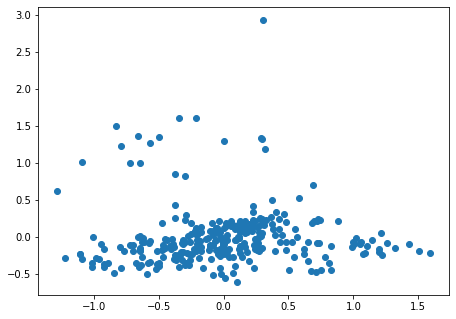

In [8]:
z = dataAnalysis(2, x)
visualize(2, z)